1. Συλλογή Δεδομένων

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price                           Price
Ticker                           AAPL
Datetime                             
2025-05-23 13:30:00+00:00  196.369995
2025-05-23 14:00:00+00:00  197.169998
2025-05-23 14:30:00+00:00  195.930099
2025-05-23 15:00:00+00:00  196.585007
2025-05-23 15:30:00+00:00  196.200104


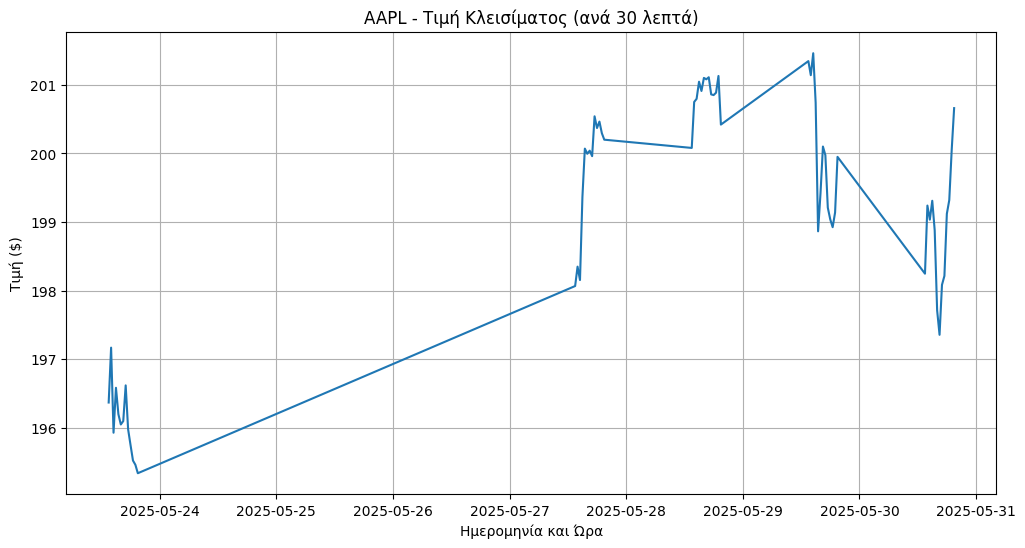

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Επιλογή της μετοχής apple
ticker = "AAPL"

# Λήψη δεδομένων 5 ημερών ανά 30 λεπτά
df = yf.download(tickers=ticker, period="5d", interval="30m")

# Κρατάμε μόνο τη στήλη 'Close'
df = df[['Close']].copy()
df.rename(columns={'Close': 'Price'}, inplace=True)

# Εμφάνιση των πρώτων 5 σημείων
print(df.head())

# Αποθήκευση σε CSV
df.to_csv(f"{ticker}_prices_only.csv")

#Πλοτάρισμα
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Price'])
plt.title(f"{ticker} - Τιμή Κλεισίματος (ανά 30 λεπτά)")
plt.xlabel("Ημερομηνία και Ώρα")
plt.ylabel("Τιμή ($)")
plt.grid(True)
plt.show()

2. Πολυωνυμική Προσαρμογή Ελαχίστων Τετραγώνων

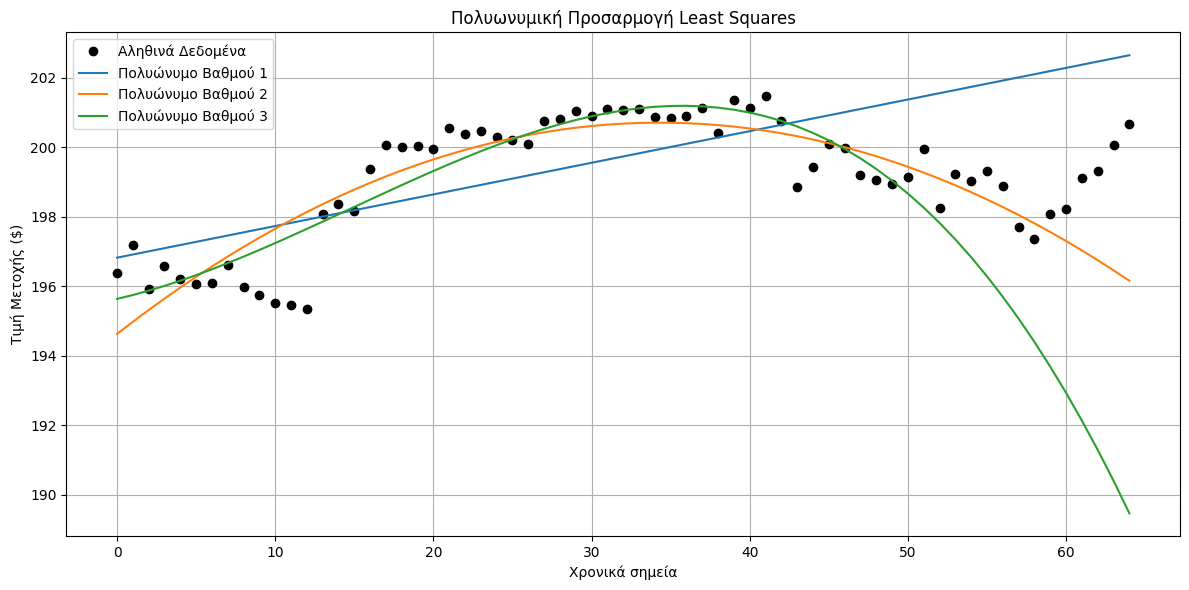

   Βαθμός  MAE_Train  MSE_Train  MAE_Test   MSE_Test
0       1   1.238468   1.913228  3.233696  11.109335
1       2   0.667139   0.832282  1.379089   3.664408
2       3   0.566881   0.649429  4.763168  32.540745


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Διαβάζουμε το csv αρχείο
df = pd.read_csv("AAPL_prices_only.csv", header=1)  # Αγνοούμε την πρώτη γραμμή με τις ετικέτες

# Αλλάζουμε τα ονόματα όπως μας βολεύει
df = df.rename(columns={'Ticker': 'Datetime', 'AAPL': 'Price'})
# Αφαίρεση της πρώτης γραμμής (που έχει string "Datetime" και NaN)
df = df[1:].copy()

# Μετατροπή του datetime σε datetime αντικείμενα για σωστή χρονική διαχείριση των δεδομένων.
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Όριζουμε τους άξονες συντεταγμένων έτσι ώστε να δείξουμε την πορεία της μετοχής με το πέρασμα του χρόνου.
x = np.arange(len(df))
y = df['Price'].values

# Χωρίζουμε τα δεδομένα σε training (80%) και testing (20%)
split_index = int(0.8 * len(x))
x_train = x[:split_index]
x_test =  x[split_index:]
y_train = y[:split_index]
y_test =  y[split_index:]

# Εφαρμογή Πολυωνυμική Προσαρμογή Ελαχίστων Τετραγώνων

#Βαθμοί πολυωνύμων
degrees = [1, 2, 3]
results = []

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'ko', label='Αληθινά Δεδομένα')

for deg in degrees:
    # Fit σε training set
    #Μέσω της συνάρτησης polyfit βρίσκουμε το κατάλληλο πολυώνυμο που προσεγγίζει καλύτερα τα δεδομένα
    # Προπονώντας το μόνο με τα training data!!
    coeffs = np.polyfit(x_train, y_train, deg)
    poly = np.poly1d(coeffs)

    # Προβλέψεις
    y_pred_train = poly(x_train)
    y_pred_test = poly(x_test)
    y_pred_full = poly(x)  # για το plot

    # Υπολογισμός σφαλμάτων
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    results.append((deg, mae_train, mse_train, mae_test, mse_test))

    # Σχεδίαση
    plt.plot(x, y_pred_full, label=f'Πολυώνυμο Βαθμού {deg}')

plt.title("Πολυωνυμική Προσαρμογή Least Squares")
plt.xlabel("Χρονικά σημεία")
plt.ylabel("Τιμή Μετοχής ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Πίνακας με συγκριτικά σφάλματα
results_df = pd.DataFrame(results, columns=["Βαθμός", "MAE_Train", "MSE_Train", "MAE_Test", "MSE_Test"])
print(results_df)


3. Πρόβλεψη Επόμενης Ημέρας

                   Datetime  Predicted Price
0 2025-05-30 20:00:00+00:00       198.269630
1 2025-05-30 20:30:00+00:00       198.164174
2 2025-05-30 21:00:00+00:00       198.059227
3 2025-05-30 21:30:00+00:00       197.955033
4 2025-05-30 22:00:00+00:00       197.851833
5 2025-05-30 22:30:00+00:00       197.749870
6 2025-05-30 23:00:00+00:00       197.649388
7 2025-05-30 23:30:00+00:00       197.550628
8 2025-05-31 00:00:00+00:00       197.453833
9 2025-05-31 00:30:00+00:00       197.359246


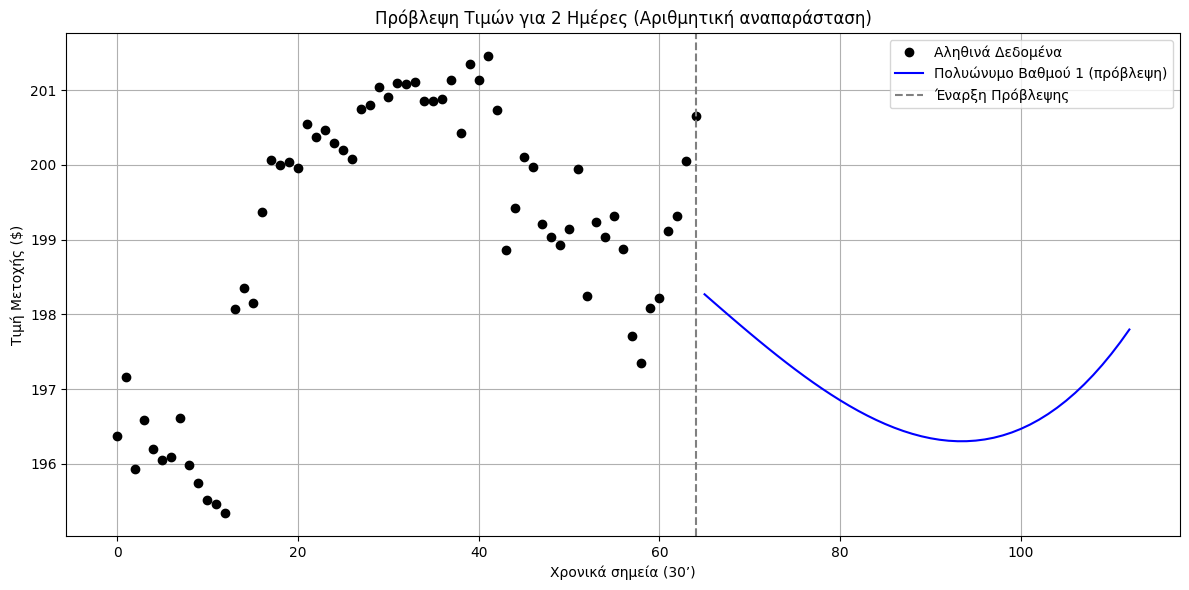

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Αριθμητικός άξονας x για τα πραγματικά δεδομένα
x = np.arange(len(df))
y = df['Price'].values

# προσαρμογή πολυωνύμου 3ου βαθμού σε όλα τα δεδομένα
coeffs = np.polyfit(x, y, deg=3)
poly = np.poly1d(coeffs)

# Επεκτείνουμε τον άξονα για την πρόβλεψη (48 σημεία = 2 μέρες)
future_steps = 48
x_future = np.arange(len(x), len(x) + future_steps)
y_pred = poly(x_future)


last_dt = df['Datetime'].iloc[-1]
future_times = pd.date_range(start=last_dt + pd.Timedelta(minutes=30),
                             periods=future_steps,
                             freq='30min')

# Σύνδεση των σημείων σε DataFrame
forecast_df = pd.DataFrame({
    'Datetime': future_times,
    'Predicted Price': y_pred
})

print(forecast_df.head(10))  # δείχνει τα 10 πρώτα σημεία πρόβλεψης
forecast_df.to_csv("prediction_curve_points.csv", index=False)


# Γράφημα
plt.figure(figsize=(12,6))
plt.plot(x, y, 'ko', label='Αληθινά Δεδομένα')
plt.plot(x_future, y_pred, 'b-', label='Πολυώνυμο Βαθμού 1 (πρόβλεψη)')
plt.axvline(x=len(x)-1, color='gray', linestyle='--', label='Έναρξη Πρόβλεψης')
plt.xlabel("Χρονικά σημεία (30’)")
plt.ylabel("Τιμή Μετοχής ($)")
plt.title("Πρόβλεψη Τιμών για 2 Ημέρες (Αριθμητική αναπαράσταση)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4. Ολοκλήρωση της Καμπύλης Τιμών για Μέση Τιμή


In [7]:
import numpy as np
import pandas as pd

y = df['Price'].values
max_h = 6  # μέγιστο βήμα )
degrees = [1,2,3]  # βαθμός πολυωνύμου

results = []
for degrees in range(1,4):
    for h in range(1, max_h + 1):
        # Δειγματοληψία με βήμα h
        x_sampled = np.arange(0, len(y), h)
        y_sampled = y[x_sampled]

        # Fit μοντέλου πάνω στα δείγματα
        coeffs = np.polyfit(x_sampled, y_sampled, degrees)
        poly = np.poly1d(coeffs)
        y_poly = poly(x_sampled)

        # Τραπεζίου
        n = len(y_poly) - 1
        trapz = y_poly[0] + y_poly[-1] + 2 * np.sum(y_poly[1:n])
        trapz = (h / 2) * trapz
        mean_trapz = trapz / ((n) * h)

        # Simpson
        if len(y_poly) % 2 == 0:
            y_poly = y_poly[:-1]
        n_simpson = len(y_poly) - 1
        simp = y_poly[0] + y_poly[n_simpson]
        simp += 4 * np.sum(y_poly[1:n_simpson:2])
        simp += 2 * np.sum(y_poly[2:n_simpson-1:2])
        simp = (h / 3) * simp
        mean_simp = simp / (n_simpson * h)

        results.append((degrees,h, mean_trapz, mean_simp))

# Πίνακας αποτελεσμάτων
results_df = pd.DataFrame(results, columns=["βαθμός","Βήμα h", "Μέση Τιμή (Τραπεζίου)", "Μέση Τιμή (Simpson)"])
print(results_df)


    βαθμός  Βήμα h  Μέση Τιμή (Τραπεζίου)  Μέση Τιμή (Simpson)
0        1       1             199.084811           199.084811
1        1       2             198.969051           198.969051
2        1       3             199.044349           198.970138
3        1       4             198.933687           198.933687
4        1       5             198.917260           198.917260
5        1       6             198.811299           198.811299
6        2       1             199.125451           199.126096
7        2       2             199.046641           199.049144
8        2       3             199.163128           199.207695
9        2       4             199.061949           199.070500
10       2       5             199.109112           199.126553
11       2       6             199.036681           199.061723
12       3       1             199.125451           199.126096
13       3       2             199.046641           199.049144
14       3       3             199.163128           199

5. Ανίχνευση Ανωμαλιών στα Ιστορικά Δεδομένα

[*********************100%***********************]  1 of 1 completed


Aitken vs Actual: 184.97 vs 196.05
Aitken vs Actual: 192.92 vs 195.46
Aitken vs Actual: 203.78 vs 200.07
Aitken vs Actual: 195.84 vs 200.46
Aitken vs Actual: 196.57 vs 201.04
Aitken vs Actual: 199.41 vs 200.85
Aitken vs Actual: 191.69 vs 201.46
Aitken vs Actual: 199.49 vs 199.21
Aitken vs Actual: 187.55 vs 199.24
Aitken vs Actual: 200.92 vs 198.09


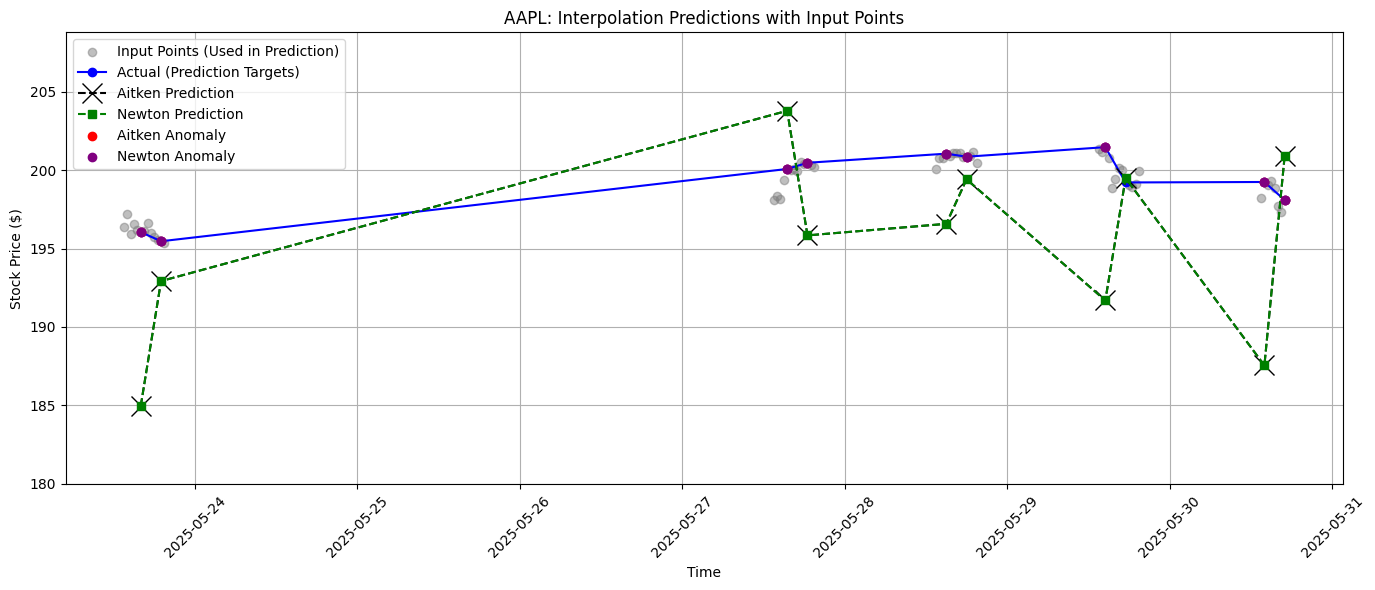

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Ανάγνωση δεδομένων
data = yf.download("AAPL", period="5d", interval="30m", auto_adjust=True)

# Εξαγωγή χρονικών στιγμών και τιμών κλεισίματος
timestamps = data.index.to_numpy()
prices = data['Close'].to_numpy()

# === Ορισμός Μεθόδων ===

# Μέθοδος Aitken-Neville
def aitken_neville(x_points, y_points, x):
    n = len(x_points)
    P = [[0 for _ in range(n)] for _ in range(n)]  # Πίνακας ενδιάμεσων αποτελεσμάτων
    for i in range(n):
        P[i][0] = y_points[i]  # Αρχικές τιμές
    for j in range(1, n):  # Βαθμός παρεμβολής
        for i in range(n - j):  # Υπολογισμός παρεμβολής για κάθε σημείο
            P[i][j] = ((x - x_points[i + j]) * P[i][j - 1] +
                       (x_points[i] - x) * P[i + 1][j - 1]) / (x_points[i] - x_points[i + j])
    return P[0][n - 1]  # Τελική τιμή παρεμβολής

# Υπολογισμός διηρημένων διαφορών για παρεμβολή Newton
def newton_divided_diff(x, y):
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):  # Επίπεδο διαφορών
        for i in range(n - 1, j - 1, -1):  # Υπολογισμός κάθε συντελεστή
            coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])
    return coef  # Συντελεστές πολυωνύμου

# Υπολογισμός τιμής παρεμβολής με Newton
def newton_predict(x_points, y_points, x):
    coef = newton_divided_diff(np.array(x_points), np.array(y_points))
    result = coef[0]
    prod = 1.0
    for i in range(1, len(coef)):  # Χρήση τύπου του Newton
        prod *= (x - x_points[i - 1])
        result += coef[i] * prod
    return result

# Ορισμός Παραμέτρων

interval = 5  # Κάθε πόσα σημεία να γίνεται παρεμβολή
actual_times, actual_vals = [], []  # Πραγματικές τιμές για έλεγχο
aitken_vals, newton_vals = [], []  # Τιμές πρόβλεψης
anomalies_aitken, anomalies_newton = [], []  # Έλεγχος για ανωμαλίες
base_point_times, base_point_prices = [], []  # Βασικά σημεία εισόδου (παρεμβολής)

# Κύριο loop

# Επαναληπτικά, παίρνουμε groups από τιμές και κάνουμε πρόβλεψη στην επόμενη τιμή
for i in range(0, len(prices) - interval - 1, interval + 1):
    x_vals = list(range(interval))  # Τεχνητές x-συντεταγμένες: 0,1,2,...
    y_vals = prices[i:i + interval]  # Τιμές για παρεμβολή
    actual_val = prices[i + interval]  # Πραγματική τιμή προς πρόβλεψη
    actual_time = timestamps[i + interval]  # Αντίστοιχη χρονική στιγμή

    # Παρεμβολή με Aitken-Neville
    aitken_val = aitken_neville(x_vals, y_vals, interval)
    aitken_val = aitken_val.item()

    # Παρεμβολή με Newton
    newton_val = newton_predict(x_vals, y_vals, interval)
    newton_val = newton_val.item()

    # Υπολογισμός σφάλματος πρόβλεψης και κατωφλίου για ανωμαλίες
    aitken_error = abs(aitken_val - actual_val)
    newton_error = abs(newton_val - actual_val)
    price_range = max(y_vals) - min(y_vals)
    std_dev = np.std(y_vals)
    threshold = 0.05 * price_range + 0.5 * std_dev  # Κατώφλι ευαισθησίας

    # Αποθήκευση προβλέψεων και ανωμαλιών
    actual_times.append(actual_time)
    actual_vals.append(actual_val)
    aitken_vals.append(aitken_val)
    newton_vals.append(newton_val)
    anomalies_aitken.append(aitken_error > threshold)
    anomalies_newton.append(newton_error > threshold)

    # Αποθήκευση των σημείων εισόδου για plotting
    base_point_times += list(timestamps[i:i + interval])
    base_point_prices += list(prices[i:i + interval])

#  Απεικόνιση Αποτελεσμάτων

plt.figure(figsize=(14, 6))  # Μέγεθος γραφήματος

# Σημεία που χρησιμοποιήθηκαν για την παρεμβολή
plt.scatter(base_point_times, base_point_prices, color='gray', alpha=0.5,
            label='Input Points (Used in Prediction)', zorder=1)

# Εκτύπωση προβλέψεων για έλεγχο
for i in range(len(aitken_vals)):
    aitken = aitken_vals[i]
    actual = actual_vals[i].item()
    print(f"Aitken vs Actual: {aitken:.2f} vs {actual:.2f}")

# Πραγματικές τιμές (στόχοι πρόβλεψης)
plt.plot(actual_times, actual_vals, 'o-', color='blue', label='Actual (Prediction Targets)')

# Προβλέψεις με Aitken και Newton
plt.plot(actual_times, aitken_vals, 'x--', color='black', label='Aitken Prediction', markersize=15)
plt.plot(actual_times, newton_vals, 's--', color='green', label='Newton Prediction')

# Απεικόνιση ανωμαλιών (π.χ. αστοχία πρόβλεψης)
for idx, is_anomaly in enumerate(anomalies_aitken):
    if is_anomaly:
        plt.scatter(actual_times[idx], actual_vals[idx], color='red',
                    label='Aitken Anomaly' if idx == 0 else "", zorder=5)
for idx, is_anomaly in enumerate(anomalies_newton):
    if is_anomaly:
        plt.scatter(actual_times[idx], actual_vals[idx], color='purple',
                    label='Newton Anomaly' if idx == 0 else "", zorder=5)

# Μορφοποίηση γραφήματος
plt.title('AAPL: Interpolation Predictions with Input Points')
plt.xlabel('Time')
plt.ylabel('Stock Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(min(min(actual_vals), min(aitken_vals)) - 5, max(max(actual_vals), max(aitken_vals)) + 5)
plt.show()
